In [1]:
file = 'coronavirus-tweet-id-2020-01-21-22.txt'
add = '\\'
walk_dir ="D:\Project\Msc project\Time_series_Covid-19\data\covid-id"
walk_dir=walk_dir+add+file

"D:\Project\Msc project\COVID-19-TweetIDs\2020-01\coronavirus-tweet-id-2020-01-21-22.txt"
fp = open("./data/covid-id/2020-01/coronavirus-tweet-id-2020-01-21-22.txt", "r")
id_list = fp.readlines()
fp.close()
id_list

FileNotFoundError: [Errno 2] No such file or directory: './data/covid-id/2020-01/coronavirus-tweet-id-2020-01-21-22.txt'

In [2]:
import pandas
import numpy as np
import copy
import matplotlib.pyplot as plt
import torch

In [3]:
confirm = pandas.read_csv('./data/time_series_covid19_confirmed_US.csv')

FileNotFoundError: [Errno 2] File b'./data/time_series_covid19_confirmed_US.csv' does not exist: b'./data/time_series_covid19_confirmed_US.csv'

In [ ]:
confirm

In [6]:
death = pandas.read_csv('./data/time_series_covid19_deaths_US.csv')

In [11]:
data = pandas.read_csv('./data/time_series_covid19_confirmed_US.csv')

In [12]:
dates = data.columns[11:]

In [13]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20', '7/15/20',
       '7/16/20', '7/17/20', '7/18/20', '7/19/20'],
      dtype='object', length=180)

In [15]:
states = list(set(confirm.Province_State.values))
states[57]

'South Dakota'

### STEPS:
1. Convert to state level with horizon - state and vertical - date
2. Visualise the data
3. Get daily new cases by reducing daily cases

In [176]:
sum(confirm[confirm.Province_State == 'Puerto Rico']['7/19/20'].values)

12063

### 1. Convert to state level with horizon - state and vertical - date

In [16]:
total_confirm_sum= []
for date in dates:
    date_confirm_sum= []
    for state in states:
        state_cases = sum(confirm[confirm.Province_State == state][date].values)
        date_confirm_sum.append(state_cases)
    total_confirm_sum.append(date_confirm_sum)

In [25]:
confirm_states = pandas.DataFrame(total_confirm_sum, columns = states)
confirm_states.index

RangeIndex(start=0, stop=180, step=1)

In [18]:
import copy
confirm_states_copy = copy.deepcopy(confirm_states)

In [23]:
confirm_states_copy['Northern Mariana Islands']

0       0
1       0
2       0
3       0
4       0
       ..
175    36
176    37
177    37
178    37
179    37
Name: Northern Mariana Islands, Length: 180, dtype: int64

In [21]:
confirm_states_copy = confirm_states_copy.reindex(sorted(confirm_states_copy.columns), axis=1)

In [33]:
confirm_states_copy

Alabama  Alaska  American Samoa  Arizona  Arkansas  California  Colorado  \
0          0       0               0        0         0           0         0   
1          0       0               0        0         0           0         0   
2          0       0               0        0         0           0         0   
3          0       0               0        0         0           0         0   
4          0       0               0        1         0           2         0   
..       ...     ...             ...      ...       ...         ...       ...   
175    59067    1631               0   131354     30297      354885     38137   
176    61088    1693               0   134613     31114      364706     38708   
177    63091    1734               0   138523     31762      373259     39326   
178    65234    1796               0   141265     32533      380745     39770   
179    67011    1875               0   143624     33228      386906     40124   

     Connecticut  Delaware  Diamond Princess  ...  Tennessee   Texas   Utah  \
0              0         0                 0  ...          0       0      0   
1              0         0                 0  ...          0       0      0   
2              0         0                 0  ...          0       0      0   
3              0         0                 0  ...          0       0      0   
4              0         0                 0  ...          0       0      0   
..           ...       ...               ...  ...        ...     ...    ...   
175        47636     13050                49  ...      69061  290892  30891   
176        47750     13114                49  ...      71540  305854  31845   
177        47893     13337                49  ...      73819  317768  32572   
178        47893     13429                49  ...      76336  327106  33332   
179        47893     13519                49  ...      78115  335257  34117   

     Vermont  Virgin Islands  Virginia  Washington  West Virginia  Wisconsin  \
0          0               0         0           1              0          0   
1          0               0         0           1              0          0   
2          0               0         0           1              0          0   
3          0               0         0           1              0          0   
4          0               0         0           1              0          0   
..       ...             ...       ...         ...            ...        ...   
175     1318             243     73527       43046           4557      38727   
176     1325             249     74431       44313           4657      39627   
177     1334             263     75433       45067           4783      40507   
178     1338             283     76373       46026           4894      41485   
179     1350             283     77430       46946           4990      42315   

     Wyoming  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
175     1985  
176     2026  
177     2069  
178     2108  
179     2126  

[180 rows x 58 columns]

In [28]:
states_full = ['Alabama','Alaska','American Samoa','Arizona','Arkansas','California',
 'Colorado','Connecticut','Delaware','District of Columbia','Florida','Georgia',
 'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
 'Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri',
 'Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York',
 'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Puerto Rico',
 'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
 'Virgin Islands','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

In [31]:
for state in confirm_states_copy.columns:
    if state not in states_full:
        print(state)

Diamond Princess
Grand Princess
Guam
Northern Mariana Islands


In [313]:
total_death_sum= []
for date in dates:
    date_death_sum= []
    for state in states:
        state_cases = sum(death[death.Province_State == state][date].values)
        date_death_sum.append(state_cases)
    total_death_sum.append(date_death_sum)

In [314]:
death_states = pandas.DataFrame(total_death_sum, columns = states)
death_states

Maine  Idaho  California  Delaware  Utah  Kentucky  Nevada  \
0        0      0           0         0     0         0       0   
1        0      0           0         0     0         0       0   
2        0      0           0         0     0         0       0   
3        0      0           0         0     0         0       0   
4        0      0           0         0     0         0       0   
..     ...    ...         ...       ...   ...       ...     ...   
175    114    110        7375       521   233       645     618   
176    114    114        7489       521   234       650     626   
177    115    118        7603       521   235       658     637   
178    117    119        7702       523   243       667     646   
179    117    119        7715       523   243       670     647   

     South Carolina  Arkansas  American Samoa  ...  Nebraska  North Dakota  \
0                 0         0               0  ...         0             0   
1                 0         0               0  ...         0             0   
2                 0         0               0  ...         0             0   
3                 0         0               0  ...         0             0   
4                 0         0               0  ...         0             0   
..              ...       ...             ...  ...       ...           ...   
175             998       335               0  ...       291            88   
176            1070       341               0  ...       299            89   
177            1096       353               0  ...       301            90   
178            1135       357               0  ...       301            90   
179            1155       357               0  ...       301            92   

     Connecticut  Ohio  Wyoming  Mississippi  Colorado  Alabama  Montana  \
0              0     0        0            0         0        0        0   
1              0     0        0            0         0        0        0   
2              0     0        0            0         0        0        0   
3              0     0        0            0         0        0        0   
4              0     0        0            0         0        0        0   
..           ...   ...      ...          ...       ...      ...      ...   
175         4380  3075       22         1290      1744     1211       34   
176         4389  3103       24         1308      1745     1230       35   
177         4396  3112       24         1332      1751     1265       37   
178         4396  3132       24         1346      1752     1286       37   
179         4396  3174       25         1355      1752     1287       37   

     Tennessee  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
175        783  
176        796  
177        815  
178        838  
179        843  

[180 rows x 58 columns]

In [293]:
daily_cases = confirm_states.astype(np.int64)

In [280]:
### Check the confirmed cases at first day- 21 Jan 2020 which was not zero, Washington
daily_cases.iloc[0]

Maine                       0
Idaho                       0
California                  0
Delaware                    0
Utah                        0
Kentucky                    0
Nevada                      0
South Carolina              0
Arkansas                    0
American Samoa              0
Washington                  1
New Jersey                  0
Northern Mariana Islands    0
Virginia                    0
Wisconsin                   0
Missouri                    0
West Virginia               0
Michigan                    0
Oregon                      0
Indiana                     0
Massachusetts               0
Louisiana                   0
Alaska                      0
New Mexico                  0
New York                    0
Hawaii                      0
Iowa                        0
Texas                       0
Diamond Princess            0
Rhode Island                0
Pennsylvania                0
Georgia                     0
Grand Princess              0
Guam      

In [307]:
daily_cases['Washington'][0] = 1

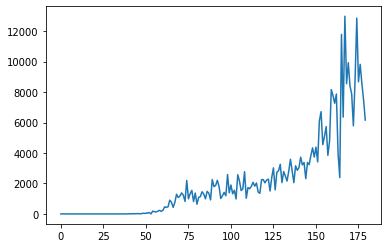

In [296]:
daily_cases = daily_cases.diff().fillna(0)

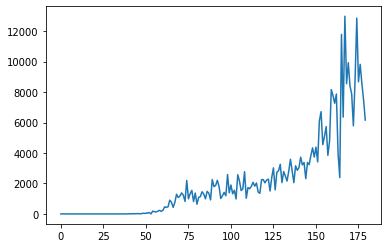

In [302]:
plt.plot(daily_cases['California'])

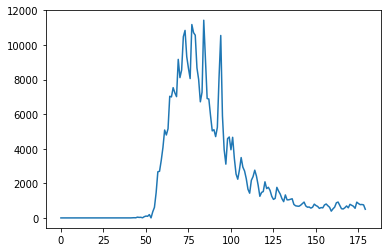

In [300]:
plt.plot(daily_cases['New York'])

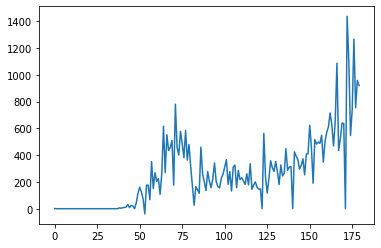

In [308]:
plt.plot(daily_cases['Washington'])

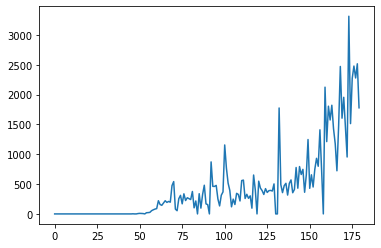

In [309]:
plt.plot(daily_cases['Tennessee'])

In [323]:
### DataFrame to .txt file without header and idnex

daily_cases.to_csv('./data/daily_cases.txt', sep=',', index=False, header = 0)

In [46]:
### Examle of transforming list to .txt file

values = ['1, 2, 3', '4, 5, 6']
with open("file.txt", "w") as output:
    for value in values:
        output.write('%s\n' % value)

In [53]:
sum(data[data.Province_State == 'Puerto Rico']['7/10/20'].values)

9137

In [114]:
total = []

for date in dates:
    cases = []
    for state in data.Province_State.values:
        n = sum(data[data.Province_State == state][date].values)
        n = str(n)
        cases.append(n)
    total.append(','.join(cases))

In [121]:
total[100]

'0,0,0,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,0,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,1

In [115]:
with open("file.txt", "w") as output:
    for value in total:
        output.write('%s\n' % value)

In [60]:
1. 轉換成daily new cases
2. 壓縮至[0,1]之間

SyntaxError: invalid syntax (<ipython-input-60-5d5eb3b4c094>, line 1)

In [116]:
data

UID iso2 iso3  code3     FIPS          Admin2  \
0           16   AS  ASM     16     60.0             NaN   
1          316   GU  GUM    316     66.0             NaN   
2          580   MP  MNP    580     69.0             NaN   
3     63072001   PR  PRI    630  72001.0        Adjuntas   
4     63072003   PR  PRI    630  72003.0          Aguada   
...        ...  ...  ...    ...      ...             ...   
3335  84070016   US  USA    840      NaN    Central Utah   
3336  84070017   US  USA    840      NaN  Southeast Utah   
3337  84070018   US  USA    840      NaN  Southwest Utah   
3338  84070019   US  USA    840      NaN       TriCounty   
3339  84070020   US  USA    840      NaN    Weber-Morgan   

                Province_State Country_Region        Lat       Long_  ...  \
0               American Samoa             US -14.271000 -170.132000  ...   
1                         Guam             US  13.444300  144.793700  ...   
2     Northern Mariana Islands             US  15.097900  145.673900  ...   
3                  Puerto Rico             US  18.180117  -66.754367  ...   
4                  Puerto Rico             US  18.360255  -67.175131  ...   
...                        ...            ...        ...         ...  ...   
3335                      Utah             US  39.372319 -111.575868  ...   
3336                      Utah             US  38.996171 -110.701396  ...   
3337                      Utah             US  37.854472 -111.441876  ...   
3338                      Utah             US  40.124915 -109.517442  ...   
3339                      Utah             US  41.271160 -111.914512  ...   

     7/10/20  7/11/20  7/12/20  7/13/20  7/14/20  7/15/20  7/16/20  7/17/20  \
0          0        0        0        0        0        0        0        0   
1          1        0        0        2        0        1        1        0   
2          0        2        0        0        3        0        1        0   
3          1        2        0        3        0        0        0        1   
4          0        2        2        3        1        2        0        6   
...      ...      ...      ...      ...      ...      ...      ...      ...   
3335      20        3        4        1        2        5        6       11   
3336       3        4        0        1       -1        0        0        1   
3337      68       56       64       47       24       18       81       78   
3338       0        2        4        3        1        6        3        8   
3339      60       38       64       22       28       23      198       99   

      7/18/20  7/19/20  
0           0        0  
1           0        0  
2           0        0  
3           1        4  
4           1        3  
...       ...      ...  
3335        6        5  
3336        1        2  
3337       52       68  
3338       11        2  
3339       77       49  

[3340 rows x 191 columns]

In [9]:
from torch.autograd import Variable

In [22]:
np.newaxis

In [12]:
def load_sim_mat(data):
    adj = torch.Tensor(np.loadtxt(data, delimiter=','))
    # normalize
    rowsum = 1. / torch.sqrt(adj.sum(dim=0))
    adj = rowsum[:, np.newaxis] * adj * rowsum[np.newaxis, :]
    adj = Variable(adj)
    return adj

In [29]:
raw = torch.Tensor(np.loadtxt('./data/ind_mat.txt', delimiter=','))
rowsum = 1. / torch.sqrt(raw.sum(dim=0))
rowsum

tensor([0.5000, 0.5774, 0.5000, 0.5000, 0.7071, 0.5000, 0.5000, 0.5774, 0.7071,
        0.5000, 0.5000, 0.7071, 0.5774, 0.4472, 0.5000, 0.5774, 0.5000, 0.7071,
        1.0000, 0.4472, 0.5000, 0.7071, 0.7071, 0.4472, 1.0000, 0.5774, 0.5774,
        0.5000, 0.7071])

In [38]:
raw.sum(dim=0)

tensor([4., 3., 4., 4., 2., 4., 4., 3., 2., 4., 4., 2., 3., 5., 4., 3., 4., 2.,
        1., 5., 4., 2., 2., 5., 1., 3., 3., 4., 2.])

In [25]:
rowsum[np.newaxis, :]

tensor([[0.5000, 0.5774, 0.5000, 0.5000, 0.7071, 0.5000, 0.5000, 0.5774, 0.7071,
         0.5000, 0.5000, 0.7071, 0.5774, 0.4472, 0.5000, 0.5774, 0.5000, 0.7071,
         1.0000, 0.4472, 0.5000, 0.7071, 0.7071, 0.4472, 1.0000, 0.5774, 0.5774,
         0.5000, 0.7071]])

In [28]:
rowsum[:, np.newaxis]

tensor([[0.5000],
        [0.5774],
        [0.5000],
        [0.5000],
        [0.7071],
        [0.5000],
        [0.5000],
        [0.5774],
        [0.7071],
        [0.5000],
        [0.5000],
        [0.7071],
        [0.5774],
        [0.4472],
        [0.5000],
        [0.5774],
        [0.5000],
        [0.7071],
        [1.0000],
        [0.4472],
        [0.5000],
        [0.7071],
        [0.7071],
        [0.4472],
        [1.0000],
        [0.5774],
        [0.5774],
        [0.5000],
        [0.7071]])

In [14]:
a = load_sim_mat('./data/ind_mat.txt')
a

tensor([[0.2500, 0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.2887, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2236, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.3333, 0.2887, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3333, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.2887, 0.2500, 0.0000, 0.3536, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2887, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.2500, 0.0000, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000

In [15]:
a.sum(dim=0)

tensor([1.0123, 0.9553, 1.1809, 1.0772, 0.8536, 0.9736, 0.9736, 0.8802, 0.8536,
        1.1422, 0.9736, 0.8536, 0.8802, 1.1054, 1.1158, 0.9553, 1.1422, 0.8536,
        1.0000, 1.1290, 1.1158, 0.8536, 0.8536, 1.1054, 1.0000, 0.9107, 0.8802,
        1.1036, 0.8536])

In [16]:

1. / torch.sqrt(a.sum(dim=0))

tensor([0.9939, 1.0231, 0.9202, 0.9635, 1.0824, 1.0135, 1.0135, 1.0659, 1.0824,
        0.9357, 1.0135, 1.0824, 1.0659, 0.9511, 0.9467, 1.0231, 0.9357, 1.0824,
        1.0000, 0.9411, 0.9467, 1.0824, 1.0824, 0.9511, 1.0000, 1.0479, 1.0659,
        0.9519, 1.0824])